In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
#part a
data = load_breast_cancer()
x = data.data
y = data.target
#part b
print(data.feature_names)
print(data.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [5]:
#part c
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = .5, random_state = 0)


In [6]:
#part f
dtClass = DecisionTreeClassifier(criterion='entropy', max_depth=2)
dtClass.fit(xTrain, yTrain)
yPred = dtClass.predict(xTest)

In [8]:
print(accuracy_score(yTest, yPred))
print(confusion_matrix(yTest, yPred))

0.8947368421052632
[[ 88  13]
 [ 17 167]]


[Text(0.5, 0.8333333333333334, 'mean concave points <= 0.049\nentropy = 0.965\nsamples = 284\nvalue = [111, 173]\nclass = benign'),
 Text(0.25, 0.5, 'worst concave points <= 0.111\nentropy = 0.198\nsamples = 163\nvalue = [5, 158]\nclass = benign'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.059\nsamples = 145\nvalue = [1, 144]\nclass = benign'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.764\nsamples = 18\nvalue = [4, 14]\nclass = benign'),
 Text(0.75, 0.5, 'worst perimeter <= 114.65\nentropy = 0.541\nsamples = 121\nvalue = [106, 15]\nclass = malignant'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.994\nsamples = 33\nvalue = [18, 15]\nclass = malignant'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 88\nvalue = [88, 0]\nclass = malignant')]

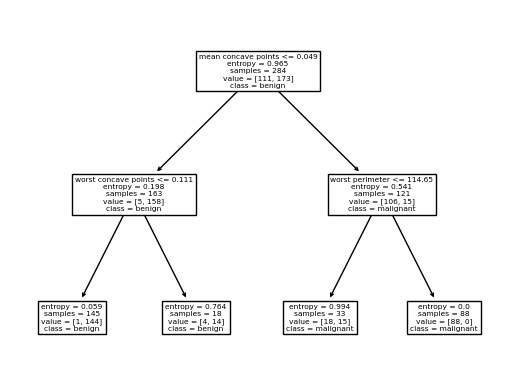

In [10]:
plot_tree(dtClass, feature_names = data.feature_names, class_names = data.target_names)